### Minimum Wages and Employment: A Case Study of the Fast-Food Industry in New Jersey and Pennsylvania, Card and Krueger

On April 1, 1992, New Jersey's minimum wage rose from 4.25 to 5.05 per hour. To evaluate the impact 410 fast-food restaurants in NJ near eastern PA (where the minimum wage was constant) were surveyed before and after the rise.

Treatment: change in min wage from 4.25 to 5.05 on April , 1992 in NJ

Outcome: change in the level of employment

Method: Difference-in-difference

Research question: Does a rise in minimum wage affect employment?

The results produced by Card and Krueger challenged the idea that a fixed minimum wage results in a reduction of labor demand.

paper available: http://davidcard.berkeley.edu/papers/njmin-aer.pdf

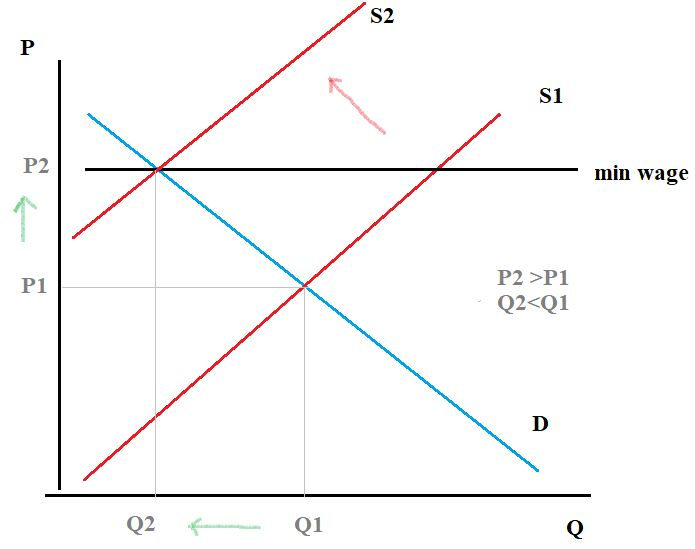

Difference-in-difference combines the comparison of the participant's state before and after treatment (employment in NJ before and after the min wage change) and a comparison between the participant (NJ) and non-participant (PA).

The basic idea is to observe the (self-selected) treatment group and a (self-selected) comparison group before and after the treatment.

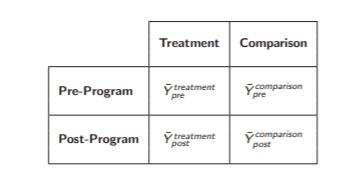

### Common trends assumption -- basic assumptions underlying DID estimation
(DID does not identify the treatment effect if treatment and comparison groups were on different trajectories prior to the program.)

- Selection bias relates to fixed characteristics of objects under study

- Time trends are the same for treatment and control groups. 

##### common trends assumtion is upheld:
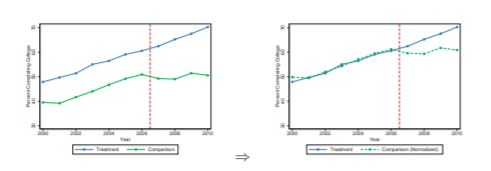

##### common trends assumtion is violated:
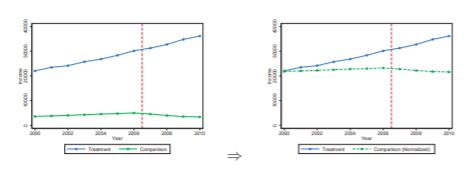


Treatment effect heterogeneity is the degree to which different treatments have differential causal effects on each unit.


### DID with a regression model

result is equivalent to first differences

#                     Y2 - Y1  =        a   +   n   +  c + t + e

change in the outcome of interest  =  pre-program in comparison gr. + treatment effect + selection bias + time trend + error

In [4]:
library(tidyverse)
library(expss)

# 1. DATA PREP

In [2]:
direct <- "did_krueger"

In [3]:
# download file from a website

URL <- "http://davidcard.berkeley.edu/data_sets/njmin.zip"
destfile <- "C:/Users/aslop/Documents/CLASSES/SPRING 2019/Econometrics/Difference-in-difference/wages.zip"
download.file(URL, destfile)

# data cleaning code: https://www.brodrigues.co/blog/2019-05-04-diffindiff_part2/

The next lines import the codebook:

In [5]:
codebook <- read_lines(file = paste0(direct, "/codebook"))

In [6]:
codebook

[1] "              Code Book for New Jersey-Pennsylvania Data Set"                                                                                                                                                                                                                                                
 [2] ""                                                                                                                                                                                                                                                                                                            
 [3] "Note: there are 410 observations in the data set"                                                                                                                                                                                                                                                            
 [4] ""                                                                                                                                                                                                                                                                                                            
 [5] "            Column Location"                                                                                                                                                                                                                                                                                 
 [6] " Name:       Start    End    Format     Explanation"                                                                                                                                                                                                                                                         
 [7] "<c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4><c4>"
 [8] "SHEET           1        3     3.0   sheet number (unique store id)"                                                                                                                                                                                                                                         
 [9] "CHAIN           5        5     1.0   chain 1=bk; 2=kfc; 3=roys; 4=wendys"                                                                                                                                                                                                                                    
[10] "CO_OWNED        7        7     1.0   1 if company owned"                                                                                                                                                                                                                                                     
[11] "STATE           9        9     1.0   1 if NJ; 0 if Pa                      "                                                                                                                                                                                                                                 
[12] ""                                                                                                                                                                                                                                                                                                            
[13] "Dummies for location:"                                                                                                                                                                                                                                                                                     

In [7]:
variable_names <- codebook %>%
    `[`(8:59) %>% #I select lines 8 to 59 using the `[`() function
    `[`(-c(5, 6, 13, 14, 32, 33)) %>%  #I remove lines that I do not need
    str_sub(1, 13) %>% # I only keep the first 13 characters 
# (which are the variable names, plus some white space characters) 
    str_squish() %>%   #  to remove all the unneeded white space characters
    str_to_lower()  # change the column names to lowercase

In [8]:
glimpse(variable_names)

 chr [1:46] "sheet" "chain" "co_owned" "state" "southj" "centralj" "northj" ...


In [9]:
variable_names

[1] "sheet"    "chain"    "co_owned" "state"    "southj"   "centralj"
 [7] "northj"   "pa1"      "pa2"      "shore"    "ncalls"   "empft"   
[13] "emppt"    "nmgrs"    "wage_st"  "inctime"  "firstinc" "bonus"   
[19] "pctaff"   "meals"    "open"     "hrsopen"  "psoda"    "pfry"    
[25] "pentree"  "nregs"    "nregs11"  "type2"    "status2"  "date2"   
[31] "ncalls2"  "empft2"   "emppt2"   "nmgrs2"   "wage_st2" "inctime2"
[37] "firstin2" "special2" "meals2"   "open2r"   "hrsopen2" "psoda2"  
[43] "pfry2"    "pentree2" "nregs2"   "nregs112"

In [10]:
# I then load the data, and add the column names that I extracted before:
dataset <- read_table2(paste0(direct, "/public.dat"),  # from readr
                      col_names = FALSE)

Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X18 = col_double(),
  X20 = col_double(),
  X21 = col_double(),
  X22 = col_double(),
  X28 = col_double(),
  X29 = col_double(),
  X30 = col_double(),
  X47 = col_logical()
)
See spec(...) for full column specifications.


In [11]:
# remove the 47th column, which is empty 
# name the columns with `colnames<-`().
dataset <- dataset %>%
    select(-X47) %>%
    `colnames<-`(., variable_names) %>%
    mutate_all(as.numeric) %>%
    mutate(sheet = as.character(sheet))

Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning me

In [12]:
glimpse(dataset)

Observations: 410
Variables: 46
$ sheet    <chr> "46", "49", "506", "56", "61", "62", "445", "451", "455", ...
$ chain    <dbl> 1, 2, 2, 4, 4, 4, 1, 1, 2, 2, 3, 1, 1, 1, 1, 2, 2, 3, 3, 3...
$ co_owned <dbl> 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0...
$ state    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ southj   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ centralj <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ northj   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ pa1      <dbl> 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ pa2      <dbl> 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ shore    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ ncalls   <dbl> 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2...
$ empft    <dbl> 30.0, 6.5, 3.0, 20.0, 6.0, 0.0, 50.0, 10.0, 2.0, 2.0, 2.5,...
$ emppt    <dbl> 15.

# 2. DESCRIPTIVE STATISTICS


### Calculate Full-time Equivalent Employment variable (FTE)

Full-time Equivalent Employment (FTE) was calculated as the number of full-time workers including managers plus 0.5 of part-time workers.

In [13]:
data1 <- dataset %>% 
select(co_owned, 
       southj, 
       centralj, 
       northj, 
       pa1, 
       pa2,
       wage_st,
       wage_st2,
       hrsopen,
       hrsopen2,
       empft,
       emppt,
       nmgrs,
       empft2,
       emppt2,
       nmgrs2,
       state,
       chain,
       status2) %>% 
# mutate_all(funs(replace_na(.,0))) %>% 
mutate(state = as.character(as.numeric(state))) %>% 

mutate(fte_before = empft + nmgrs + emppt*0.5,
       fte_after = empft2 + nmgrs2 + emppt2*0.5)

In [14]:
head(data1)

co_owned,southj,centralj,northj,pa1,pa2,wage_st,wage_st2,hrsopen,hrsopen2,...,emppt,nmgrs,empft2,emppt2,nmgrs2,state,chain,status2,fte_before,fte_after
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,1,0,NA,4.30,16.5,16.5,...,15.0,3,3.5,35,3,0,1,1,40.50,24.0
0,0,0,0,1,0,NA,4.45,13.0,13.0,...,6.5,4,0.0,15,4,0,2,1,13.75,11.5
1,0,0,0,1,0,NA,5.00,10.0,11.0,...,7.0,2,3.0,7,4,0,2,1,8.50,10.5
1,0,0,0,1,0,5.0,5.25,12.0,12.0,...,20.0,4,0.0,36,2,0,4,1,34.00,20.0
1,0,0,0,1,0,5.5,4.75,12.0,12.0,...,26.0,5,28.0,3,6,0,4,1,24.00,35.5
1,0,0,0,1,0,5.0,NA,12.0,12.0,...,31.0,5,NA,NA,NA,0,4,1,20.50,NA


In [15]:
unique(data1$status2)
# '1 = answered 2nd interview (count = 399)'
# '2 = closed for renovations (count = 2)' 
# '3 = closed "permanently" (count = 6)' 
# '4 = closed for highway construction (count = 1)' 
# '5 = closed due to Mall fire (count = 1)' 

[1] 1 3 4 2 0 5

In [16]:
names(data1)

[1] "co_owned"   "southj"     "centralj"   "northj"     "pa1"       
 [6] "pa2"        "wage_st"    "wage_st2"   "hrsopen"    "hrsopen2"  
[11] "empft"      "emppt"      "nmgrs"      "empft2"     "emppt2"    
[16] "nmgrs2"     "state"      "chain"      "status2"    "fte_before"
[21] "fte_after"

In [17]:
# format summary tables https://gdemin.github.io/expss/
data1 %>% tab_cells(co_owned,
              southj,
              centralj,
              northj,
              pa1,
              pa2,
              wage_st,
              wage_st2,
              hrsopen,
              hrsopen2,
              empft,
              empft2,
              chain,
              status2,
              fte_before,
              fte_after) %>% 
tab_stat_fun("Valid N" = w_n, Mean = w_mean, "Std. dev." = w_sd, "Min" = w_min, "Max" = w_max,  
             method = list) %>%
    tab_pivot() 

|            |  #Total |      |           |     |      |
 |            | Valid N | Mean | Std. dev. | Min |  Max |
 | ---------- | ------- | ---- | --------- | --- | ---- |
 |   co_owned |     410 |  0.3 |       0.5 | 0.0 |  1.0 |
 |     southj |     410 |  0.2 |       0.4 | 0.0 |  1.0 |
 |   centralj |     410 |  0.2 |       0.4 | 0.0 |  1.0 |
 |     northj |     410 |  0.4 |       0.5 | 0.0 |  1.0 |
 |        pa1 |     410 |  0.1 |       0.3 | 0.0 |  1.0 |
 |        pa2 |     410 |  0.1 |       0.3 | 0.0 |  1.0 |
 |    wage_st |     390 |  4.6 |       0.3 | 4.2 |  5.8 |
 |   wage_st2 |     389 |  5.0 |       0.3 | 4.2 |  6.2 |
 |    hrsopen |     410 | 14.4 |       2.8 | 7.0 | 24.0 |
 |   hrsopen2 |     399 | 14.5 |       2.8 | 8.0 | 24.0 |
 |      empft |     404 |  8.2 |       8.6 | 0.0 | 60.0 |
 |     empft2 |     398 |  8.3 |       8.0 | 0.0 | 40.0 |
 |      chain |     410 |  2.1 |       1.1 | 1.0 |  4.0 |
 |    status2 |     410 |  1.0 |       0.4 | 0.0 |  5.0 |
 | fte_before |     398 | 21.0 |       9.7 | 5.0 | 85.0 |
 |  fte_after |     396 | 21.1 |       9.1 | 0.0 | 60.5 |

# 3. VISUALIZE DATA

a) minium wages in NJ and PA before the law


b) minimum wages inn NJ and PA after passing the law

In [18]:
# a) minium wages in NJ and PA before the law
# define bins, construct a table and then plot it

table2 <- data1 %>% 
select(wage_st, state) %>% 
mutate(store = 1) %>% 

mutate_all(funs(replace_na(.,0)))  %>% 

# maybe just filter what we need?

mutate(category=cut(wage_st, breaks = seq(4.19, 5.60, by = 0.1),
                   labels=c("4.25",
                            "4.35",
                            "4.45",
                            "4.55",
                            "4.65",
                            "4.75",
                            "4.85",
                            "4.95",
                            "5.05",
                            "5.15",
                            "5.25",
                            "5.35",
                            "5.45",
                            "5.55"))) %>% 

group_by(state, category) %>% 
summarise(sum = sum(store, is.na = TRUE)) %>% 
mutate(category = as.character(category)) %>% 
filter(!is.na(category)) %>%
spread( key = "state", value = "sum")

Warning message:
"funs() is soft deprecated as of dplyr 0.8.0
please use list() instead

  # Before:
  funs(name = f(.))

  # After: 
  list(name = ~ f(.))
This warning is displayed once per session."Warning message:
"Factor `category` contains implicit NA, consider using `forcats::fct_explicit_na`"

In [19]:
table2

category,0,1
<chr>,<dbl>,<dbl>
4.25,27,102
4.35,2,13
4.45,NA,4
4.55,14,53
4.65,2,21
4.75,11,39
4.85,2,14
4.95,NA,3
5.05,21,51


In [20]:
# calculate total number of stores
tot <- data1 %>% select(wage_st, state) %>% 
mutate(store = 1) %>% 
group_by(state) %>% 
summarise(sum_tot = sum(store)) %>% 
spread( key = "state", value = "sum_tot") %>% 
mutate(category = "total_stores") %>% 
select(category, everything())
tot

category,0,1
<chr>,<dbl>,<dbl>
total_stores,79,331


In [21]:
# full table
full_table <- table2 %>% 
mutate(pa_percent = (`0`/79)*100,
       nj_percent = (`1`/331)*100)

full_table

category,0,1,pa_percent,nj_percent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
4.25,27,102,34.177215,30.8157100
4.35,2,13,2.531646,3.9274924
4.45,NA,4,NA,1.2084592
4.55,14,53,17.721519,16.0120846
4.65,2,21,2.531646,6.3444109
4.75,11,39,13.924051,11.7824773
4.85,2,14,2.531646,4.2296073
4.95,NA,3,NA,0.9063444
5.05,21,51,26.582278,15.4078550


In [22]:
full_n <- full_table %>% 
gather("pa_percent", "nj_percent", key = "state", value = "percent")
full_n

category,0,1,state,percent
<chr>,<dbl>,<dbl>,<chr>,<dbl>
4.25,27,102,pa_percent,34.1772152
4.35,2,13,pa_percent,2.5316456
4.45,NA,4,pa_percent,NA
4.55,14,53,pa_percent,17.7215190
4.65,2,21,pa_percent,2.5316456
4.75,11,39,pa_percent,13.9240506
4.85,2,14,pa_percent,2.5316456
4.95,NA,3,pa_percent,NA
5.05,21,51,pa_percent,26.5822785


Warning message:
"Removed 5 rows containing missing values (geom_bar)."

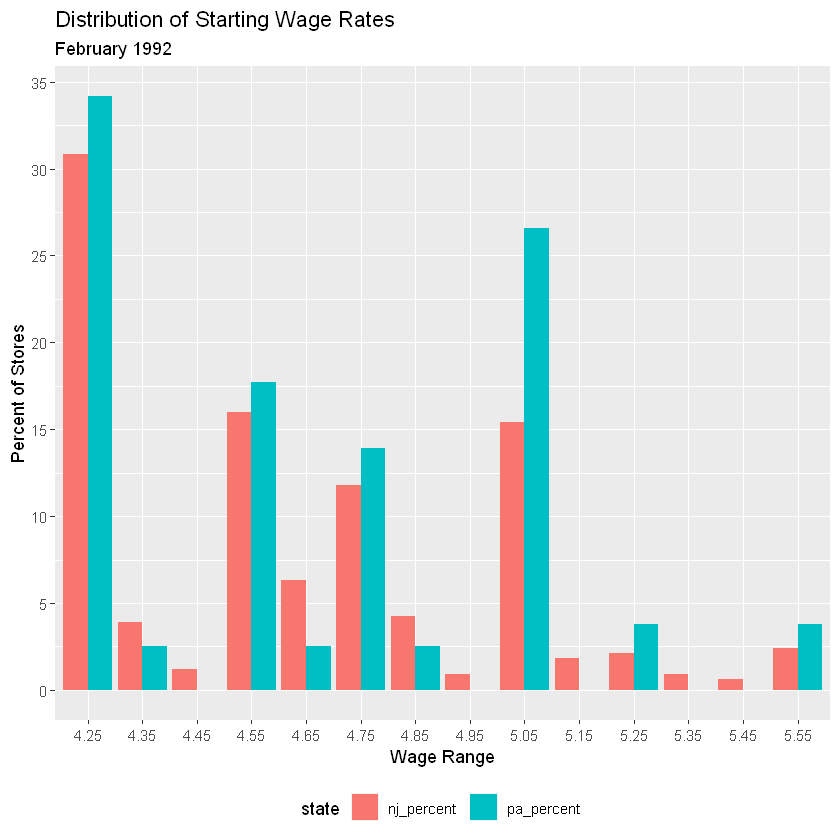

In [27]:
# standard wages before the min wage change in NJ
ggplot(data=full_n, aes(x = category, y = percent, fill = state)) +
geom_bar(stat = "identity", position = position_dodge()) +
ggtitle("Distribution of Starting Wage Rates", subtitle = "February 1992") +
scale_x_discrete("Wage Range") +
scale_y_continuous("Percent of Stores", breaks=seq(0,35,5)) +
theme(legend.position = "bottom")

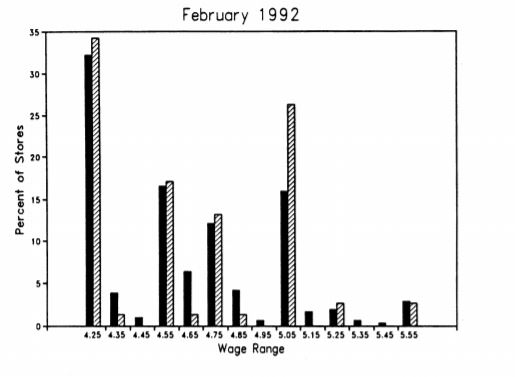

In [ ]:
# b) minimum wages inn NJ and PA after passing the law
# after November 1992 in NJ min wage became 5.05

In [28]:
table3 <- data1 %>% 
select(wage_st2, state) %>% 
mutate(store = 1) %>% 

mutate_all(funs(replace_na(.,0)))  %>% 

# maybe just filter what we need?

mutate(category=cut(wage_st2, breaks = seq(4.19, 5.60, by = 0.1),
                   labels=c("4.25",
                            "4.35",
                            "4.45",
                            "4.55",
                            "4.65",
                            "4.75",
                            "4.85",
                            "4.95",
                            "5.05",
                            "5.15",
                            "5.25",
                            "5.35",
                            "5.45",
                            "5.55"))) %>% 

group_by(state, category) %>% 
summarise(sum = sum(store, is.na = TRUE)) %>% 
mutate(category = as.character(category)) %>% 
filter(!is.na(category)) %>%
spread( key = "state", value = "sum")
table3

Warning message:
"Factor `category` contains implicit NA, consider using `forcats::fct_explicit_na`"

category,0,1
<chr>,<dbl>,<dbl>
4.25,21,NA
4.35,6,NA
4.45,3,NA
4.55,12,NA
4.75,15,NA
4.95,4,NA
5.05,15,285
5.15,NA,4
5.25,2,19


In [29]:
# calculate total number of stores
tot2 <- data1 %>% select(wage_st2, state) %>% 
mutate(store = 1) %>% 
group_by(state) %>% 
summarise(sum_tot = sum(store)) %>% 
spread( key = "state", value = "sum_tot") %>% 
mutate(category = "total_stores") %>% 
select(category, everything())
tot2

category,0,1
<chr>,<dbl>,<dbl>
total_stores,79,331


In [30]:
# full table -- needs to be reformatted

full_table2 <- table3 %>% 
mutate(pa_percent = (`0`/79)*100,
       nj_percent = (`1`/331)*100)

full_table2

category,0,1,pa_percent,nj_percent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
4.25,21,NA,26.582278,NA
4.35,6,NA,7.594937,NA
4.45,3,NA,3.797468,NA
4.55,12,NA,15.189873,NA
4.75,15,NA,18.987342,NA
4.95,4,NA,5.063291,NA
5.05,15,285,18.987342,86.1027190
5.15,NA,4,NA,1.2084592
5.25,2,19,2.531646,5.7401813


In [31]:
full_n2 <- full_table2 %>% 
gather("pa_percent", "nj_percent", key = "state", value = "percent")
full_n2

category,0,1,state,percent
<chr>,<dbl>,<dbl>,<chr>,<dbl>
4.25,21,NA,pa_percent,26.5822785
4.35,6,NA,pa_percent,7.5949367
4.45,3,NA,pa_percent,3.7974684
4.55,12,NA,pa_percent,15.1898734
4.75,15,NA,pa_percent,18.9873418
4.95,4,NA,pa_percent,5.0632911
5.05,15,285,pa_percent,18.9873418
5.15,NA,4,pa_percent,NA
5.25,2,19,pa_percent,2.5316456


Warning message:
"Removed 10 rows containing missing values (geom_bar)."

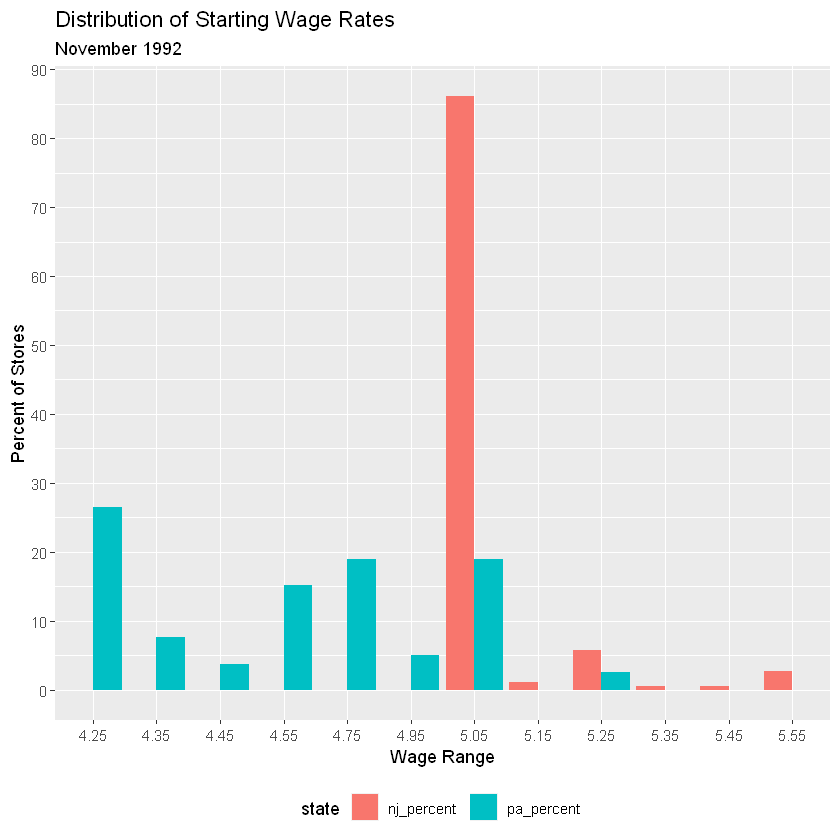

In [33]:
# standard wages after the min wage change in NJ (November 1992)

ggplot(data=full_n2, aes(x = category, y = percent, fill = state)) +
geom_bar(stat = "identity", position = position_dodge()) +
ggtitle("Distribution of Starting Wage Rates", subtitle = "November 1992") +
scale_x_discrete("Wage Range") +
scale_y_continuous("Percent of Stores", breaks=seq(0,90,10)) +
theme(legend.position = "bottom")

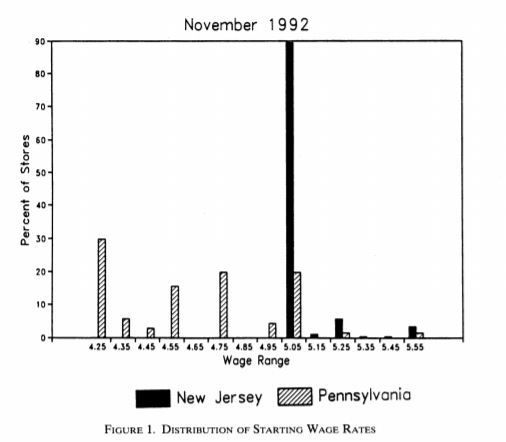

### 4. AVERAGE EMPLOYMENT PER STORE BEFORE AND AFTER THE RISE IN NJ AND MINIMUM WAGE

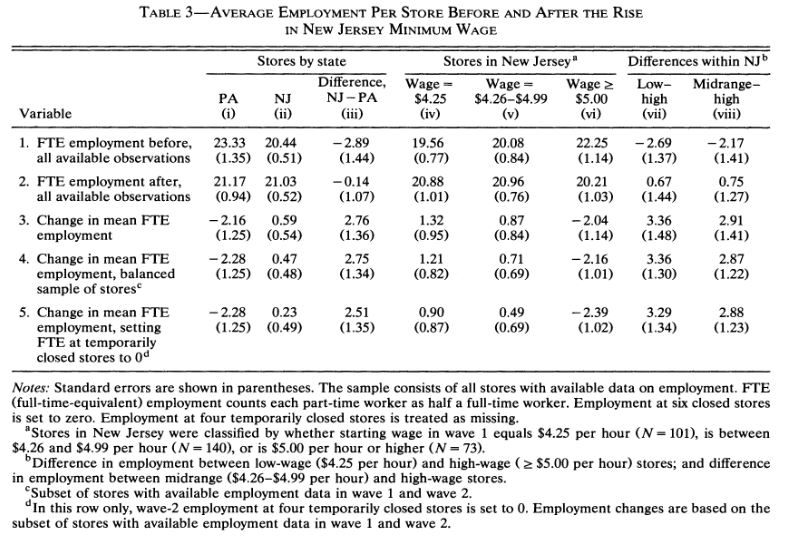

In [83]:
# 1st row: MEANs and SEs across subgroups
  results <- data1 %>% group_by(state) %>% # group_by the treatment variable
            dplyr::select(state, fte_before) %>% 
            group_by(N = n(), add = TRUE) %>% 
            summarize_all(funs(mean, var, na_sum = sum(is.na(.))), na.rm = TRUE) %>% 
            mutate(n = N - na_sum) %>% 
            mutate(se = sqrt(var/n))
            

In [84]:
results

state,N,mean,var,na_sum,n,se
<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
0,79,23.33117,140.57145,2,77,1.3511489
1,331,20.43941,82.92359,10,321,0.5082607


### A. Stores by state

In [190]:
tot_sample <- data1 %>% group_by(state) %>% 
  summarise(mean_before = mean(fte_before, na.rm=TRUE),
            mean_after = mean(fte_after, na.rm=TRUE),

            var_before = var(fte_before, na.rm=TRUE),
            var_after = var(fte_after, na.rm=TRUE),
            n_before = sum(!is.na(fte_before)),
            n_after = sum(!is.na(fte_after))) %>%
                mutate(se_mean_before = sqrt(var_before/n_before)) %>%
                mutate(se_mean_after = sqrt(var_after/n_after)) %>%

mutate(state = dplyr::recode(state, '0' = "PA", '1' = "NJ"),
      change_mean_fte = mean_after - mean_before) %>% 

select(state,
      mean_before,
      mean_after,
      change_mean_fte,
      se_mean_before,
      se_mean_after)

In [191]:
tot_sample

state,mean_before,mean_after,change_mean_fte,se_mean_before,se_mean_after
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PA,23.33117,21.16558,-2.1655844,1.3511489,0.9432212
NJ,20.43941,21.02743,0.5880214,0.5082607,0.5203094


In [194]:
# line 4 with note c: Subset of stores with available employment data in wave 1 and wave 2
balanced_sample <- data1 %>%
filter(complete.cases(fte_before, fte_after)) %>% 
group_by(state) %>% 
summarise(mean_before_balanced = mean(fte_before), # subset of stores that has data in wave1 and wave2
          mean_after_balanced = mean(fte_after))  %>% 

mutate(change_mean_fte_balanced = mean_after_balanced - mean_before_balanced,
      state = dplyr::recode(state, '0' = "PA", '1' = "NJ")) %>% 
select(state, change_mean_fte_balanced)


balanced_sample

state,change_mean_fte_balanced
<chr>,<dbl>
PA,-2.2833333
NJ,0.4666667


In [226]:
full_table <- left_join(tot_sample, balanced_sample, by = c("state" = "state")) %>% 
select(state,
      mean_before,
      mean_after,
      se_mean_before,
      se_mean_after,
      change_mean_fte,
      change_mean_fte_balanced) 
full_table

state,mean_before,mean_after,se_mean_before,se_mean_after,change_mean_fte,change_mean_fte_balanced
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PA,23.33117,21.16558,1.3511489,0.9432212,-2.1655844,-2.2833333
NJ,20.43941,21.02743,0.5082607,0.5203094,0.5880214,0.4666667


In [268]:
transposed <- as.data.frame(t(as.matrix(full_table))) %>% 
rename("PA" = "V1", "NJ" = "V2") %>% 
mutate(variable = c("state", 
                    "mean_before",
                    "mean_after",
                    "se_mean_before",
                    "se_mean_after",
                    "change_mean_fte",
                    "change_mean_fte_balanced")) %>% 
filter(variable != "state") %>% 

select(variable, everything()) %>% 
mutate(PA = as.numeric(as.character(PA)),
       NJ = as.numeric(as.character(NJ)),
       Diff_NJ_NA = NJ - PA)

transposed

variable,PA,NJ,Diff_NJ_NA
<chr>,<dbl>,<dbl>,<dbl>
mean_before,23.3311700,20.4394100,-2.8917600
mean_after,21.1655800,21.0274300,-0.1381500
se_mean_before,1.3511489,0.5082607,-0.8428882
se_mean_after,0.9432212,0.5203094,-0.4229118
change_mean_fte,-2.1655844,0.5880214,2.7536058
change_mean_fte_balanced,-2.2833333,0.4666667,2.7500000


The relative gain (the difference in difference of the changes in employment) is 2.76 FTE employees.

# 5. REGRESSION - ADJUSTED MODELS

change in employment = set of characteristics of stores i + NJ dummy (=1)

In [323]:
data2 <- dataset %>% 
select(co_owned, 
       empft,
       chain,
       emppt,
       nmgrs,
       empft2,
       emppt2,
       nmgrs2,
       state,
       chain,
       status2,
       wage_st,
       wage_st2) %>% 
mutate(state = as.character(as.numeric(state))) %>% 

mutate(fte_before = empft + nmgrs + emppt*0.5,
       fte_after = empft2 + nmgrs2 + emppt2*0.5,
      
       contr_bk = case_when(chain == "1" ~ 1, chain != "1" ~ 0),
       contr_kfc = case_when(chain == "2" ~ 1, chain != "2" ~ 0),
       contr_roys = case_when(chain == "3" ~ 1, chain != "3" ~ 0),
       contr_wend = case_when(chain == "4" ~ 1, chain != "4" ~ 0)) %>% 

filter(complete.cases(fte_before, fte_after)) %>% 
filter(complete.cases(wage_st, wage_st2) | status2 == 3)
# filter to keep stores with available data on employment and starting wages 
# including permanently closed stores

### CHAIN 1=bk; 2=kfc; 3=roys; 4=wendys'


### STATUS2 'Second Interview Status' 
'0 = refused second interview (count = 1)' 

'1 = answered 2nd interview (count = 399)' 

'2 = closed for renovations (count = 2)' 

'3 = closed "permanently" (count = 6)' 

'4 = closed for highway construction (count = 1)' 

'5 = closed due to Mall fire (count = 1)'

In [326]:
fit <- lm((fte_after - fte_before) ~ 
          state + contr_bk + contr_kfc + contr_roys + co_owned, data = data2)

In [327]:
summary(fit)


Call:
lm(formula = (fte_after - fte_before) ~ state + contr_bk + contr_kfc + 
    contr_roys + co_owned, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.803  -3.903   0.606   4.106  27.393 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -2.209      1.613  -1.369   0.1717  
state1         2.304      1.196   1.927   0.0548 .
contr_bk       0.512      1.498   0.342   0.7328  
contr_kfc      1.004      1.686   0.595   0.5519  
contr_roys    -1.705      1.682  -1.014   0.3114  
co_owned       0.308      1.094   0.282   0.7785  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.785 on 351 degrees of freedom
Multiple R-squared:  0.02315,	Adjusted R-squared:  0.009231 
F-statistic: 1.663 on 5 and 351 DF,  p-value: 0.1427


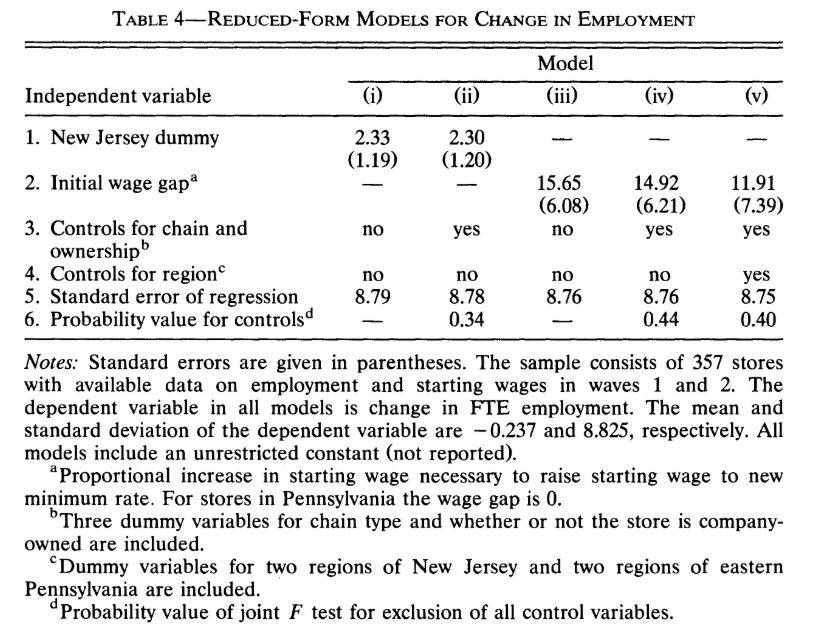